<h1 style="text-align: center;">K-means clustering</h1>

K-means defines a cluster as a representative point, just like one of the data object. The point is defined as the mean of the objects that are assignmed to the clusters.

$\mu_{k}$: mean point for the $k$-th cluster and $z_{kj}$ as a binary indicator variable that is 1 if object $n$ is assigned to the $k$-th cluster and 0 otherwise. Each object has to be assigned to one an only one cluster, i.e. $\sum_{k} z_{nk} = 1$.

$$
\boldsymbol{\mu}_{k} = \frac{\sum_{n} z_{nk} \mathbf{x}_{n}}{\sum_{n} z_{nk}}
$$

Starting with initial (random) values for the cluster means: $\boldsymbol{\mu}_{1}, \boldsymbol{\mu}_{2}, \ldots, \boldsymbol{\mu}_{K}$:

1. For each data object, $\mathbf{x}_{n}$, find $k$ that minimizes: 

Codes:

In [1]:
import scipy.io

In [2]:
kmeansdata = scipy.io.loadmat("TEMP_orig/kmeansdata.mat");

In [3]:
X = kmeansdata["X"];

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import IPython
IPython.display.set_matplotlib_formats("svg")

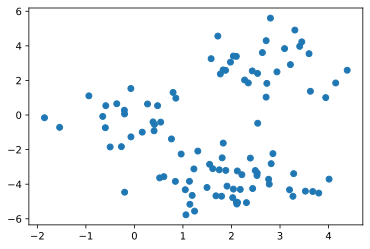

In [6]:
plt.clf()
plt.scatter(X[:,0], X[:,1], marker="o")

In [16]:
K = 3 # number of clusters

In [23]:
Ndata, Ndim = X.shape

In [21]:
cluster_means = np.random.rand(K, Ndim)*10 - 5;
cluster_means

array([[ 4.47515258, -2.75412327],
       [ 2.16923201, -4.34837731],
       [-0.49115464,  1.96038895]])

Jarak tiap titik ke masing-masing center (cluster)

In [24]:
di = np.zeros((Ndata,K))

In [70]:
for k in range(K):
    for i in range(Ndata):
        di[i,k] = np.linalg.norm(X[i,:] - cluster_means[k,:])

In [47]:
cluster_assignments = np.zeros((Ndata,K),dtype=bool);

In [54]:
cluster_ke = np.zeros(Ndata,dtype=int);

In [71]:
for i in range(Ndata):
    d = di[i,:]
    idxmin = np.argmin(d)
    cluster_assignments[i,:] = False
    cluster_assignments[i,idxmin] = True
    cluster_ke[i] = idxmin

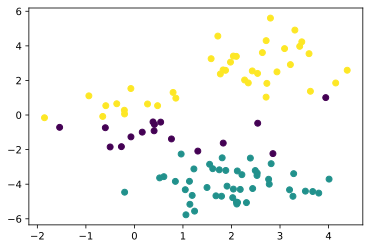

In [72]:
plt.clf()
plt.scatter(X[:,0], X[:,1], c=cluster_ke)

In [73]:
for k in range(K):
    cluster_means[k,:] = np.mean( X[cluster_assignments[:,k],:], axis=0 );

In [74]:
cluster_means

array([[ 0.75999584, -1.02642611],
       [ 2.02146822, -3.99402471],
       [ 1.81414594,  2.29781216]])

In [20]:
def Kmeans(X, Nclusters, MaxIter):
    Ndata, Ndim = X.shape
    cluster_means = np.random.rand(Nclusters, Ndim)*10 - 5; # need better
    dist = np.zeros((Ndata,Nclusters))
    cluster_assignments = np.zeros((Ndata,Nclusters),dtype=bool)
    cluster_ke = np.zeros(Ndata,dtype=int)
    old_cluster_means = np.copy(cluster_means)
    #
    for iterKmeans in range(MaxIter):
        print("iterKmeans = ", iterKmeans)
        for k in range(Nclusters):
            for i in range(Ndata):
                dist[i,k] = np.linalg.norm(X[i,:] - cluster_means[k,:])
        for i in range(Ndata):
            d = dist[i,:]
            idxmin = np.argmin(d)
            cluster_assignments[i,:] = False
            cluster_assignments[i,idxmin] = True
            cluster_ke[i] = idxmin
        # update means
        for k in range(Nclusters):
            cluster_means[k,:] = np.mean( X[cluster_assignments[:,k],:], axis=0 );
        print("cluster_means = ")
        print(cluster_means)
        print("diff means = ")
        print(cluster_means - old_cluster_means)
        old_cluster_means[:,:] = np.copy(cluster_means)
    print("Iteration completed")
    return cluster_means, cluster_ke

In [21]:
cluster_means, cluster_ke = Kmeans(X, 3, 10);

iterKmeans =  0
cluster_means = 
[[ 1.58713222  2.28757491]
 [ 1.70028009 -2.18169879]
 [ 2.08295425 -4.74038941]]
diff means = 
[[5.24223401 1.57022093]
 [2.5977514  1.61852284]
 [2.92847982 0.12639067]]
iterKmeans =  1
cluster_means = 
[[ 2.03157494  2.39106646]
 [ 0.96701591 -1.93975686]
 [ 2.15162432 -4.42797801]]
diff means = 
[[ 0.44444272  0.10349155]
 [-0.73326417  0.24194194]
 [ 0.06867007  0.3124114 ]]
iterKmeans =  2
cluster_means = 
[[ 2.31069598  2.62729262]
 [ 0.51805764 -1.36622991]
 [ 2.17000973 -4.22287938]]
diff means = 
[[ 0.27912104  0.23622616]
 [-0.44895827  0.57352695]
 [ 0.01838541  0.20509863]]
iterKmeans =  3
cluster_means = 
[[ 2.5404632   2.80764961]
 [ 0.16298846 -0.65374087]
 [ 2.06928692 -4.0280198 ]]
diff means = 
[[ 0.22976722  0.18035699]
 [-0.35506919  0.71248904]
 [-0.10072281  0.19485957]]
iterKmeans =  4
cluster_means = 
[[ 2.75632397  2.97219955]
 [ 0.14235806 -0.37237219]
 [ 2.06348791 -3.9934843 ]]
diff means = 
[[ 0.21586077  0.16454994]
 [-0.0

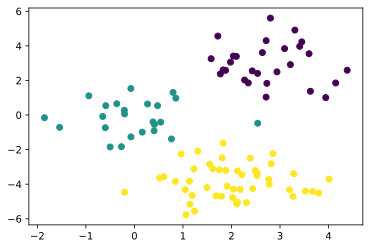

In [89]:
plt.clf()
plt.scatter(X[:,0], X[:,1], c=cluster_ke)

# Using sklearn

In [93]:
from sklearn.cluster import KMeans

In [97]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [98]:
kmeans = KMeans(n_clusters=3);

In [101]:
kmeans.fit_predict(X);

In [100]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

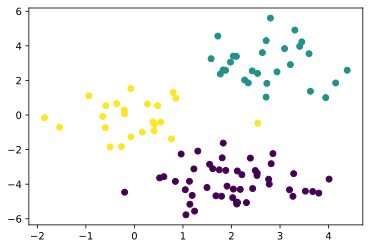

In [102]:
plt.clf()
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)